# **Assignment 3: Introduction to Classification Supervised Learning**

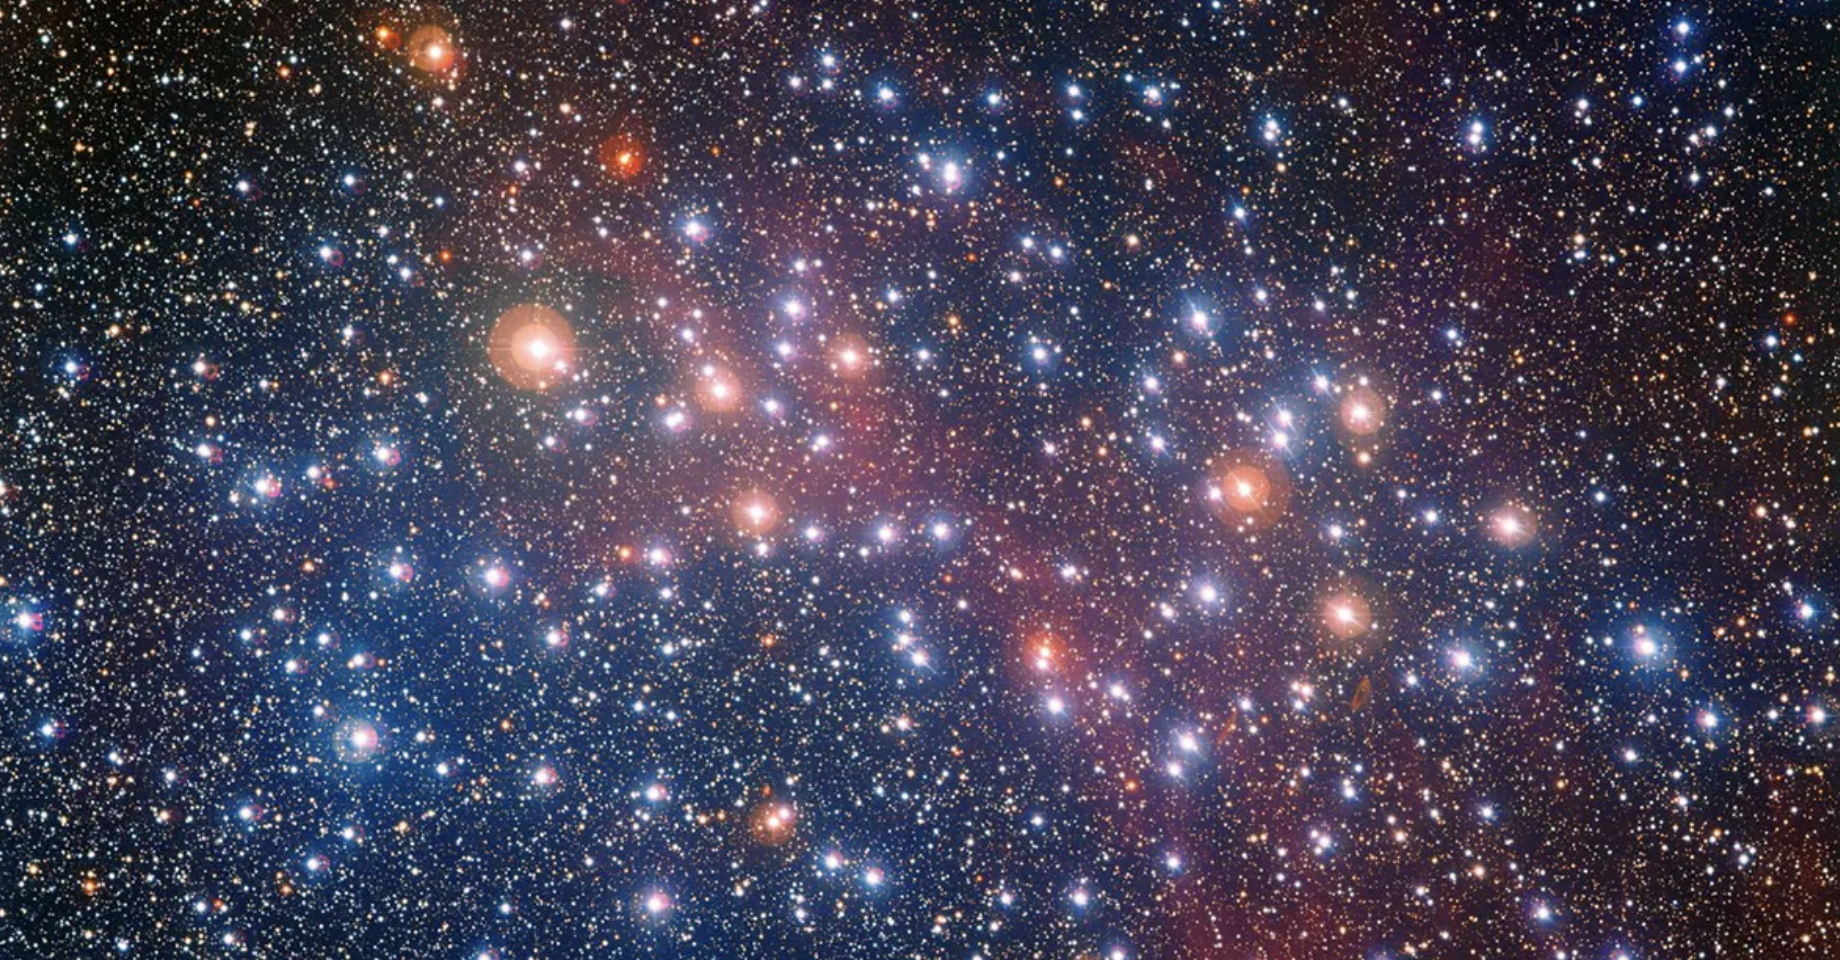

In astronomy, stellar refers to anything related to stars, including their formation, evolution, characteristics, and classification. Stars are fundamental to our understanding of the universe, as they are the primary sources of light and energy for galaxies, including our own Milky Way. Stellar studies help astronomers determine the age, composition, and size of stars, as well as their life cycles, from birth in nebulae to their eventual death, which can result in phenomena like supernovae, black holes, or white dwarfs. By classifying stars based on their properties (such as temperature, luminosity, and size), astronomers can learn about the processes that govern the universe’s structure and evolution. Stellar research also aids in determining the habitability of planets by understanding the type of star they orbit, which is crucial for finding potentially life-supporting environments beyond Earth.

# **Assignment Goal and Objectives**

The goal of this analysis is to study three primary types of stellar objects—Galaxies, Stars, and Quasi-Stellar Objects (Quasars or QSOs). By examining their unique characteristics and spectroscopic results, researchers aim to determine the type of object and facilitate further study of these entities in the context of the broader physical universe.

# **Initial Analysis**

The corresponding dataset consists of 100,000 observations of space taken by the SDSS (Sloan Digital Sky Survey). Every observation is described by 17 feature columns and 1 class column which identifies it to be either a star, galaxy or quasar. The features of data is described as follows:

*   **obj_ID**= Object Identifier, the unique value that identifies the object in the image catalog used by the CAS
*   **alpha** = Right Ascension angle (at J2000 epoch)
*   **delta** = Declination angle (at J2000 epoch)
*   **u** = Ultraviolet filter in the photometric system
*   **g** = Green filter in the photometric system
*   **r** = Red filter in the photometric system
*   **z** = Infrared filter in the photometric system
*   **i** = Near Infrared filter in the photometric system
*   **run_ID** = Run Number used to identify the specific scan
*   **rereun_ID** = Rerun Number to specify how the image was
*  **processed cam_col** = Camera column to identify the scanline within the run
field_ID = Field number to identify each field

*   **spec_obj_ID** = Unique ID used for optical spectroscopic objects (this means that 2 different observations with the same spec_obj_ID must share the output class)
*   **class** = object class (galaxy, star or quasar object)
redshift = redshift value based on the increase in wavelength
*   **plate** = plate ID, identifies each plate in SDSS
*   **MJD **= Modified Julian Date, used to indicate when a given piece of SDSS data was taken
* **fiber_ID** = fiber ID that identifies the fiber that pointed the light at the focal plane in each observation


**Question 1**:  To start the data nalayis, we need to know the data, type of data, type of features. Using Python coding, read the data, and present the type of features. Also, visualize the number of the samples in each class using plot.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn.feature_selection import mutual_info_classif
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
# Load dataset
df_raw = pd.read_csv("star_classification.csv")

#copy to avoid editing raw
df = df_raw.copy()

# getting info on shape
print("Shape:", df.shape)


Shape: (100000, 18)


In [64]:
#preview first 5 rows

display(df.head(5))

#preview last 5 rows
display(df.tail(5))

obj_ID       alpha      delta         u         g         r  \
0  1.237661e+18  135.689107  32.494632  23.87882  22.27530  20.39501   
1  1.237665e+18  144.826101  31.274185  24.77759  22.83188  22.58444   
2  1.237661e+18  142.188790  35.582444  25.26307  22.66389  20.60976   
3  1.237663e+18  338.741038  -0.402828  22.13682  23.77656  21.61162   
4  1.237680e+18  345.282593  21.183866  19.43718  17.58028  16.49747   

          i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
0  19.16573  18.79371    3606       301        2        79  6.543777e+18   
1  21.16812  21.61427    4518       301        5       119  1.176014e+19   
2  19.34857  18.94827    3606       301        2       120  5.152200e+18   
3  20.50454  19.25010    4192       301        3       214  1.030107e+19   
4  15.97711  15.54461    8102       301        3       137  6.891865e+18   

    class  redshift  plate    MJD  fiber_ID  
0  GALAXY  0.634794   5812  56354       171  
1  GALAXY  0.779136  10445  58158       427  
2  GALAXY  0.644195   4576  55592       299  
3  GALAXY  0.932346   9149  58039       775  
4  GALAXY  0.116123   6121  56187       842

obj_ID       alpha      delta         u         g         r  \
99995  1.237679e+18   39.620709  -2.594074  22.16759  22.97586  21.90404   
99996  1.237679e+18   29.493819  19.798874  22.69118  22.38628  20.45003   
99997  1.237668e+18  224.587407  15.700707  21.16916  19.26997  18.20428   
99998  1.237661e+18  212.268621  46.660365  25.35039  21.63757  19.91386   
99999  1.237661e+18  196.896053  49.464643  22.62171  21.79745  20.60115   

              i         z  run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  \
99995  21.30548  20.73569    7778       301        2       581  1.055431e+19   
99996  19.75759  19.41526    7917       301        1       289  8.586351e+18   
99997  17.69034  17.35221    5314       301        4       308  3.112008e+18   
99998  19.07254  18.62482    3650       301        4       131  7.601080e+18   
99999  20.00959  19.28075    3650       301        4        60  8.343152e+18   

        class  redshift  plate    MJD  fiber_ID  
99995  GALAXY  0.000000   9374  57749       438  
99996  GALAXY  0.404895   7626  56934       866  
99997  GALAXY  0.143366   2764  54535        74  
99998  GALAXY  0.455040   6751  56368       470  
99999  GALAXY  0.542944   7410  57104       851

In [65]:
#data types and null check
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int64(7),

In [66]:
#clean class labels
df["class"] = df["class"].astype(str).str.strip().str.upper()

#class distribution counts
class_counts = df["class"].value_counts()

#class distribution percentage
class_pct = (100 * class_counts / class_counts.sum()).round(2)

#combine counts and percent
display(pd.DataFrame({"count": class_counts, "percent": class_pct}))


count  percent
class                 
GALAXY  59445    59.44
STAR    21594    21.59
QSO     18961    18.96

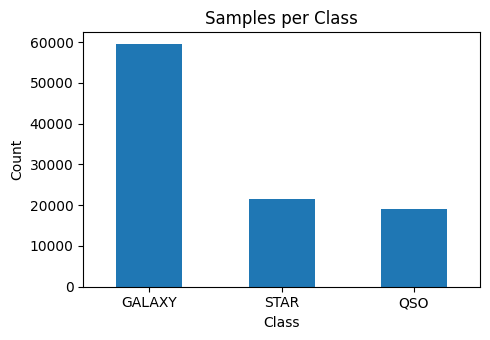

In [67]:
#barplot of class distribution
plt.figure(figsize=(5,3.5))
class_counts.plot(kind="bar")
plt.title("Samples per Class")
plt.xlabel("Class")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [68]:
#missing values overview
missing_summary = (
    df.isnull().sum()
      .to_frame("missing_count")
      .assign(missing_pct=lambda x: (100*x["missing_count"]/len(df)).round(2))
      .query("missing_count > 0")
      .sort_values("missing_count", ascending=False)
)

#show summary or message if none
display(missing_summary if not missing_summary.empty else "No missing values detected")


'No missing values detected'

In [56]:
# Full row duplicates
dup_rows = df.duplicated().sum()
print(f"Duplicate rows: {dup_rows}")

Duplicate rows: 0


In [57]:
#column data types
print("\nColumn data types:")
dtypes = df.dtypes  
display(dtypes)



Column data types:


obj_ID         float64
alpha          float64
delta          float64
u              float64
g              float64
r              float64
i              float64
z              float64
run_ID           int64
rerun_ID         int64
cam_col          int64
field_ID         int64
spec_obj_ID    float64
class           object
redshift       float64
plate            int64
MJD              int64
fiber_ID         int64
dtype: object

In [58]:
# Discrete vs Continuous

# object / bool => Discrete
# integers => could be either Discrete (if few unique values) or Continuous
# floats => Continuous

# defining "few unique values"
# optA: fixed threshold like <=20 unique values
# optB: relative threshold like <=5% of total rows

# using a mix: max(20, 5% of rows) in such a way it scales with dataset size.
from pandas import CategoricalDtype
n_rows, n_cols = df.shape


def feature_type(series: pd.Series, n_samples: int) -> str:
    if series.dtype == "bool":
        return "Discrete"
    if series.dtype == "object":
        return "Discrete"
    if isinstance(series.dtype, CategoricalDtype):   
        return "Discrete"
    if pd.api.types.is_integer_dtype(series):
        unique_vals = series.nunique(dropna=True)
        absolute_cap = 20
        relative_cap = max(5, int(0.05 * n_samples))  # avoids tiny thresholds
        return "Discrete" if unique_vals <= max(absolute_cap, relative_cap) else "Continuous"
    if pd.api.types.is_float_dtype(series):
        return "Continuous"
    return "Unknown"   # fallback, safety check

# applying it for all features
feature_types = {col: feature_type(df[col], n_rows) for col in df.columns}

print("\nFeature classification:")
for k, v in feature_types.items():
    print(f" - {k}: {v}")


Feature classification:
 - obj_ID: Continuous
 - alpha: Continuous
 - delta: Continuous
 - u: Continuous
 - g: Continuous
 - r: Continuous
 - i: Continuous
 - z: Continuous
 - run_ID: Discrete
 - rerun_ID: Discrete
 - cam_col: Discrete
 - field_ID: Discrete
 - spec_obj_ID: Continuous
 - class: Discrete
 - redshift: Continuous
 - plate: Continuous
 - MJD: Discrete
 - fiber_ID: Discrete


Discrete features: 7
Continuous features: 11
Unknown features: 0


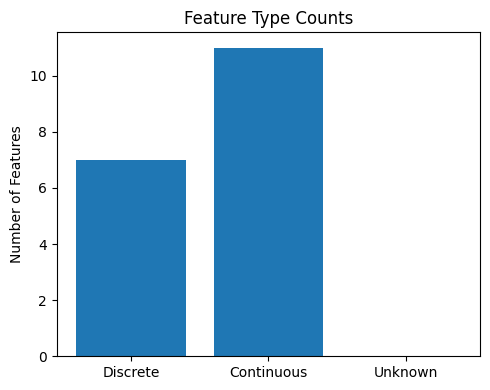

In [59]:

# visualizing features
discrete_cols = [c for c, t in feature_types.items() if t == "Discrete"]
continuous_cols = [c for c, t in feature_types.items() if t == "Continuous"]
unknown_cols = [c for c, t in feature_types.items() if t == "Unknown"]

print(f"Discrete features: {len(discrete_cols)}")
print(f"Continuous features: {len(continuous_cols)}")
print(f"Unknown features: {len(unknown_cols)}")

plt.figure(figsize=(5,4))
plt.bar(["Discrete", "Continuous", "Unknown"],
        [len(discrete_cols), len(continuous_cols), len(unknown_cols)])
plt.title("Feature Type Counts")
plt.ylabel("Number of Features")
plt.tight_layout()
plt.show()

In [60]:
print("\nStatistical numeric features:")
display(df.describe().T)


Statistical numeric features:


count          mean           std           min           25%  \
obj_ID       100000.0  1.237665e+18  8.438560e+12  1.237646e+18  1.237659e+18   
alpha        100000.0  1.776291e+02  9.650224e+01  5.527828e-03  1.275182e+02   
delta        100000.0  2.413530e+01  1.964467e+01 -1.878533e+01  5.146771e+00   
u            100000.0  2.198047e+01  3.176929e+01 -9.999000e+03  2.035235e+01   
g            100000.0  2.053139e+01  3.175029e+01 -9.999000e+03  1.896523e+01   
r            100000.0  1.964576e+01  1.854760e+00  9.822070e+00  1.813583e+01   
i            100000.0  1.908485e+01  1.757895e+00  9.469903e+00  1.773228e+01   
z            100000.0  1.866881e+01  3.172815e+01 -9.999000e+03  1.746068e+01   
run_ID       100000.0  4.481366e+03  1.964765e+03  1.090000e+02  3.187000e+03   
rerun_ID     100000.0  3.010000e+02  0.000000e+00  3.010000e+02  3.010000e+02   
cam_col      100000.0  3.511610e+00  1.586912e+00  1.000000e+00  2.000000e+00   
field_ID     100000.0  1.861305e+02  1.490111e+02  1.100000e+01  8.200000e+01   
spec_obj_ID  100000.0  5.783882e+18  3.324016e+18  2.995191e+17  2.844138e+18   
redshift     100000.0  5.766608e-01  7.307073e-01 -9.970667e-03  5.451684e-02   
plate        100000.0  5.137010e+03  2.952303e+03  2.660000e+02  2.526000e+03   
MJD          100000.0  5.558865e+04  1.808484e+03  5.160800e+04  5.423400e+04   
fiber_ID     100000.0  4.493127e+02  2.724984e+02  1.000000e+00  2.210000e+02   

                      50%           75%           max  
obj_ID       1.237663e+18  1.237668e+18  1.237681e+18  
alpha        1.809007e+02  2.338950e+02  3.599998e+02  
delta        2.364592e+01  3.990155e+01  8.300052e+01  
u            2.217914e+01  2.368744e+01  3.278139e+01  
g            2.109983e+01  2.212377e+01  3.160224e+01  
r            2.012529e+01  2.104478e+01  2.957186e+01  
i            1.940514e+01  2.039650e+01  3.214147e+01  
z            1.900460e+01  1.992112e+01  2.938374e+01  
run_ID       4.188000e+03  5.326000e+03  8.162000e+03  
rerun_ID     3.010000e+02  3.010000e+02  3.010000e+02  
cam_col      4.000000e+00  5.000000e+00  6.000000e+00  
field_ID     1.460000e+02  2.410000e+02  9.890000e+02  
spec_obj_ID  5.614883e+18  8.332144e+18  1.412694e+19  
redshift     4.241733e-01  7.041543e-01  7.011245e+00  
plate        4.987000e+03  7.400250e+03  1.254700e+04  
MJD          5.586850e+04  5.677700e+04  5.893200e+04  
fiber_ID     4.330000e+02  6.450000e+02  1.000000e+03

**Question 2**: Can you discuss the necessary steps in data pre-processing and develop them?


Boxplots


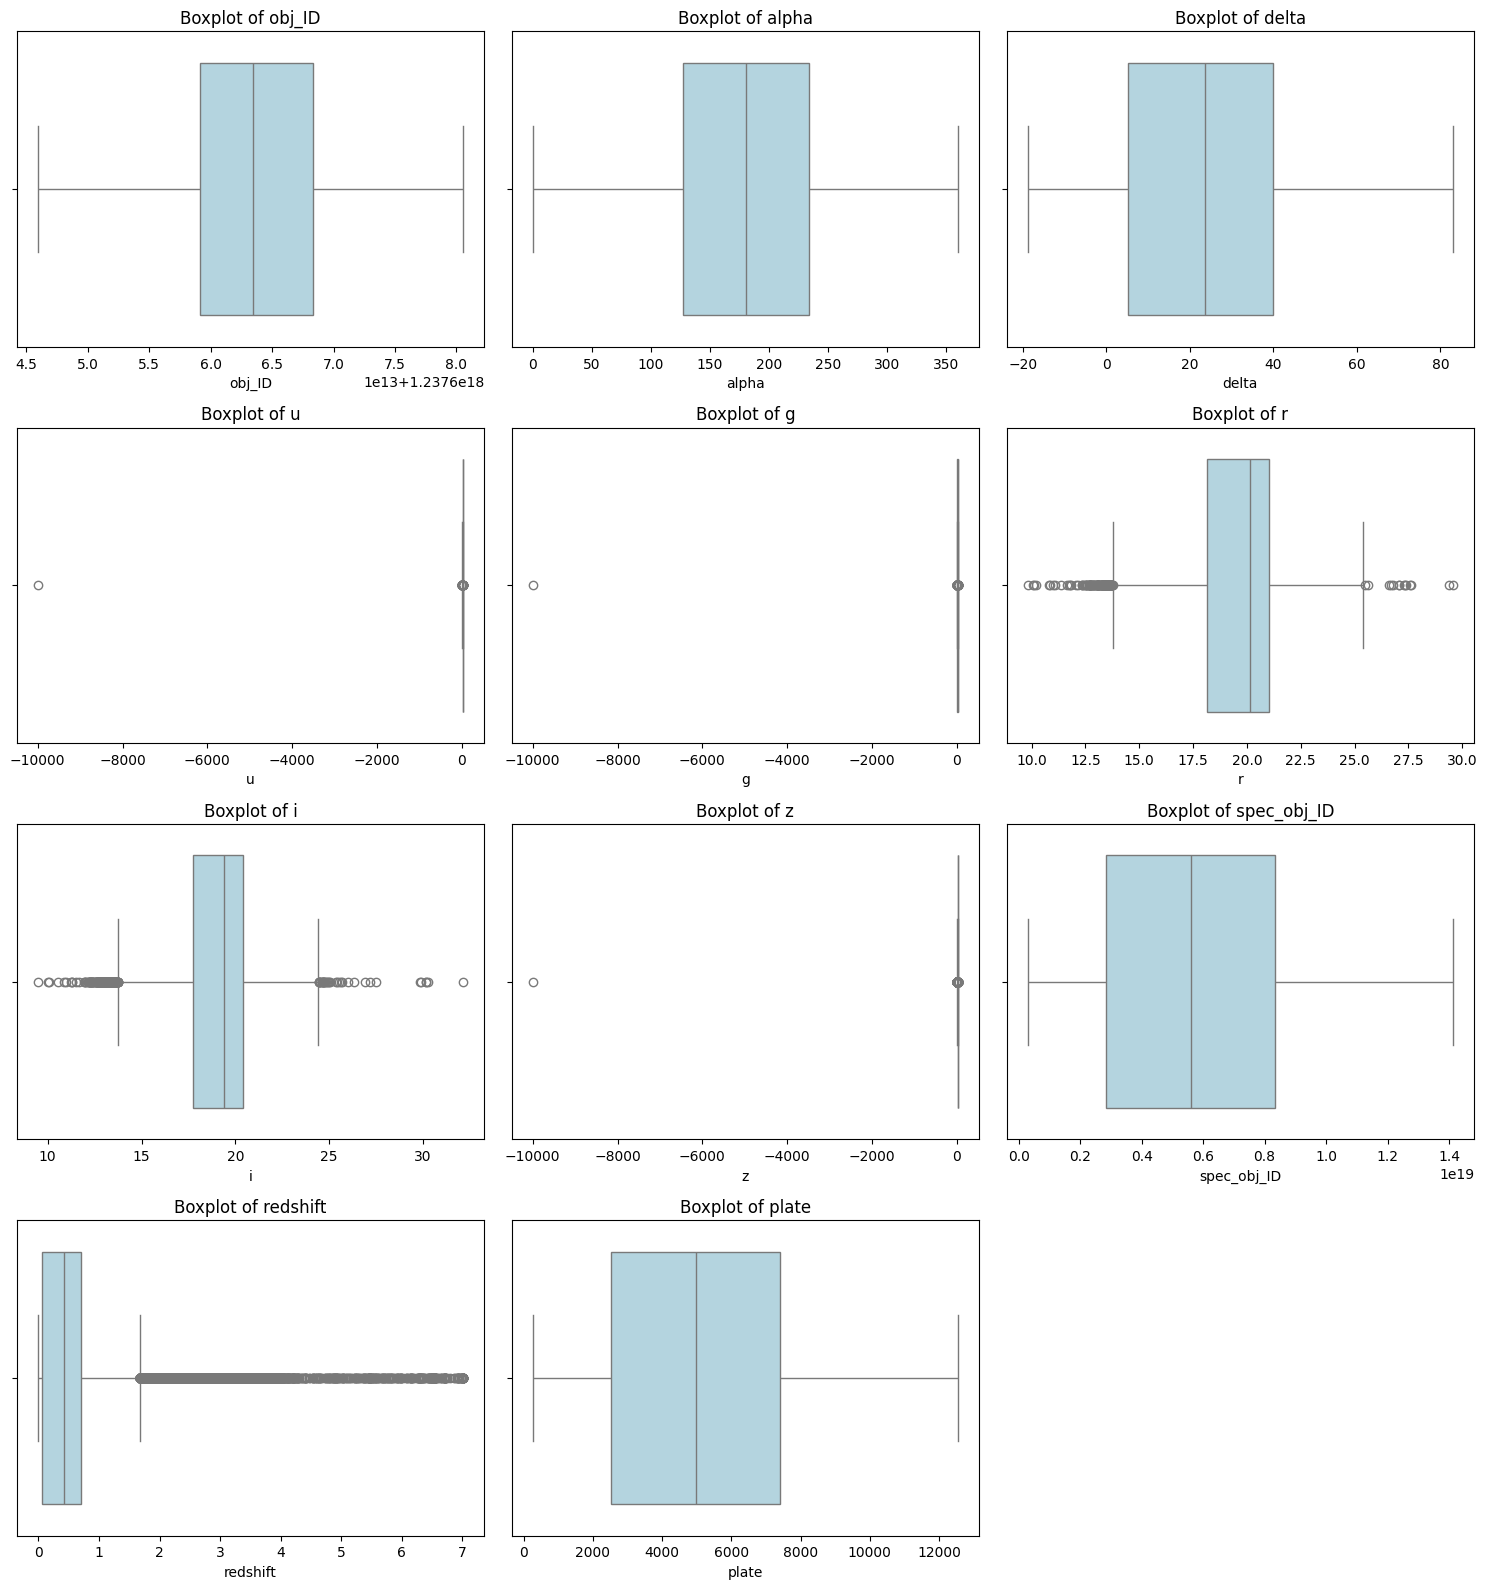

In [61]:
#plotting boxplots for finding outliers
print("\nBoxplots")

n_cols = 3   # number of boxplots per row
n_rows = int(np.ceil(len(continuous_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 4 * n_rows))
axes = axes.flatten()

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=df[col], color="lightblue", ax=axes[i])
    axes[i].set_title(f"Boxplot of {col}")

# Hide unused subplots (if continuous_cols not multiple of n_cols)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


Outlier counts per continuous feature (Z-score > 3):
 - obj_ID: 0 outliers
 - alpha: 0 outliers
 - delta: 0 outliers
 - u: 1 outliers
 - g: 1 outliers
 - r: 193 outliers
 - i: 259 outliers
 - z: 1 outliers
 - spec_obj_ID: 0 outliers
 - redshift: 1836 outliers
 - plate: 0 outliers


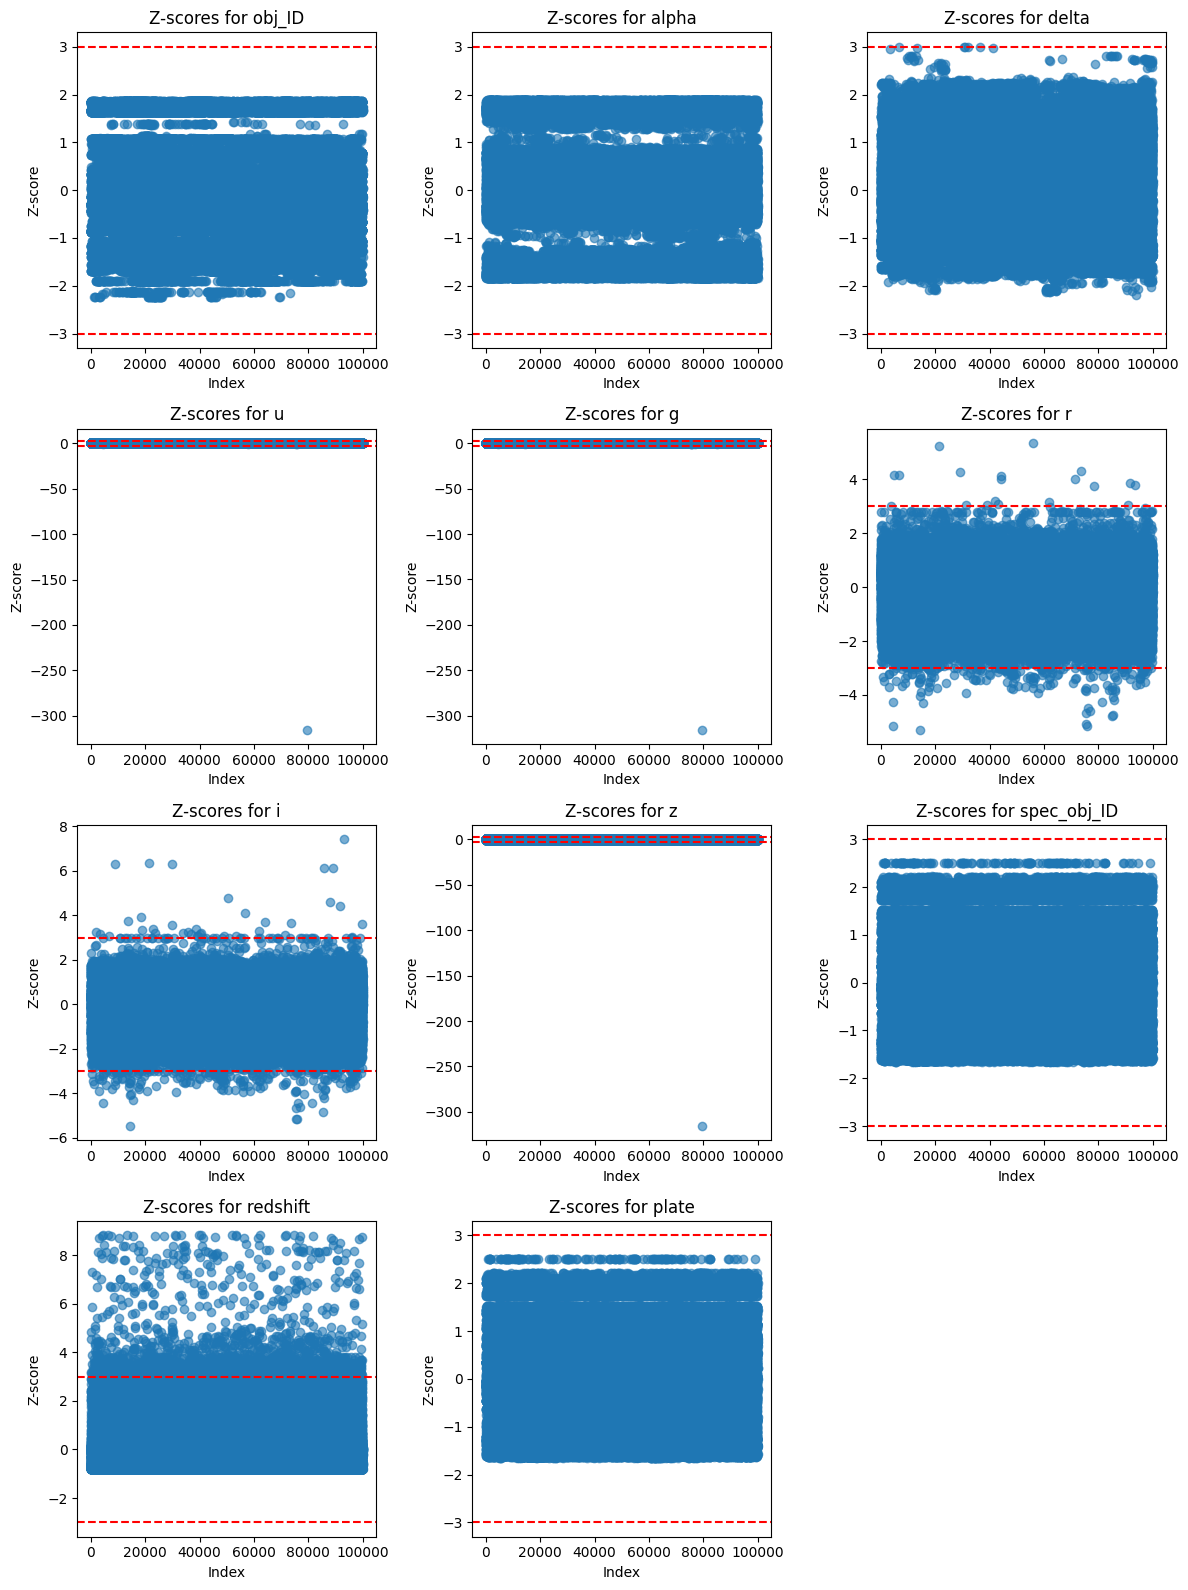

In [62]:
# Z-score calculation for finding outliers.
z_scores = np.abs(stats.zscore(df[continuous_cols], nan_policy='omit'))
if z_scores.ndim == 1:  # handling single-col 
    z_scores = z_scores.reshape(-1, 1)
    
outlier_counts = (z_scores > 3).sum(axis=0)
print("\nOutlier counts per continuous feature (Z-score > 3):")
for col, count in zip(continuous_cols, outlier_counts):
    print(f" - {col}: {int(count)} outliers")

# visualising z score using scatter plot for better understanding.

# Set up subplot grid
n_cols = 3  # number of plots per row
n_rows = int(np.ceil(len(continuous_cols) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
axes = axes.flatten()  # flatten in case of 2D array

for i, col in enumerate(continuous_cols):
    z = stats.zscore(df[col], nan_policy='omit')
    axes[i].scatter(df.index, z, alpha=0.6)
    axes[i].axhline(3, color="red", linestyle="--")
    axes[i].axhline(-3, color="red", linestyle="--")
    axes[i].set_title(f"Z-scores for {col}")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel("Z-score")

# Hide unused subplots if any
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


In [23]:
# Example: selective handling
from sklearn.preprocessing import RobustScaler
from scipy import stats
import numpy as np

df_out = df.copy()

# 1. Drop ID columns from outlier treatment
id_cols = ["obj_ID", "spec_obj_ID", "plate"]

# 2. Handle small outlier counts: drop rows
for col in ["u", "g", "z"]:
    df_out = df_out[(np.abs(stats.zscore(df_out[col], nan_policy='omit')) < 3)]

# 3. Handle moderate outlier counts: winsorize
for col in ["r", "i"]:
    lower, upper = np.percentile(df_out[col].dropna(), [5, 95])
    df_out[col] = np.clip(df_out[col], lower, upper)

# 4. Handle heavy skewed feature: RobustScaler (median/IQR scaling, outlier-robust)
scaler = RobustScaler()
df_out["redshift"] = scaler.fit_transform(df_out[["redshift"]])

print("Applied feature-specific outlier handling (drop few, winsorize moderate, RobustScaler for heavy-skewed)")


Applied feature-specific outlier handling (drop few, winsorize moderate, RobustScaler for heavy-skewed)


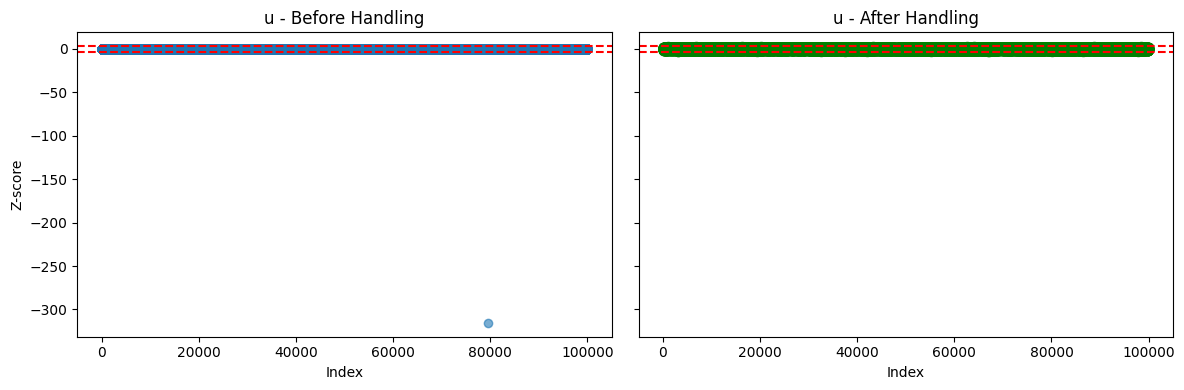

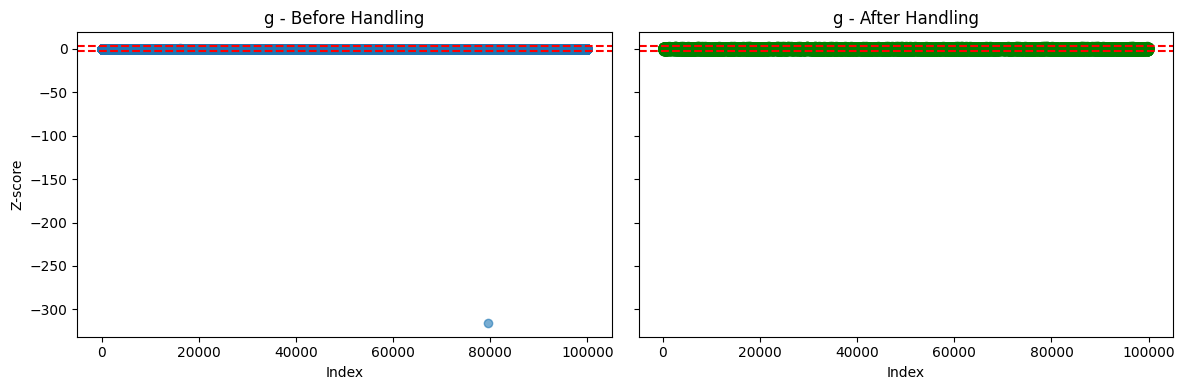

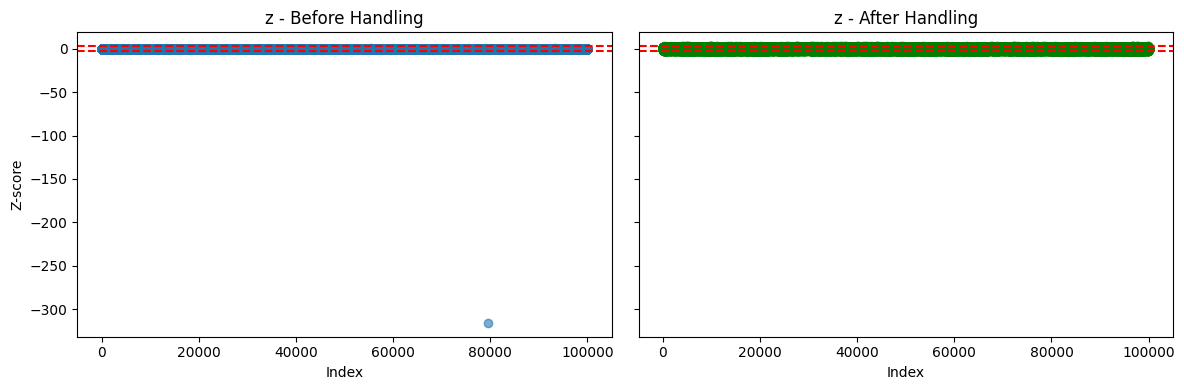

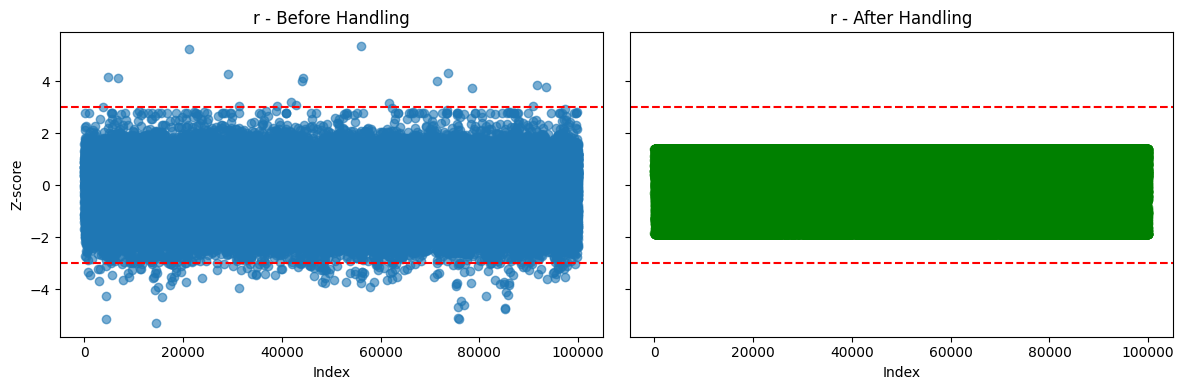

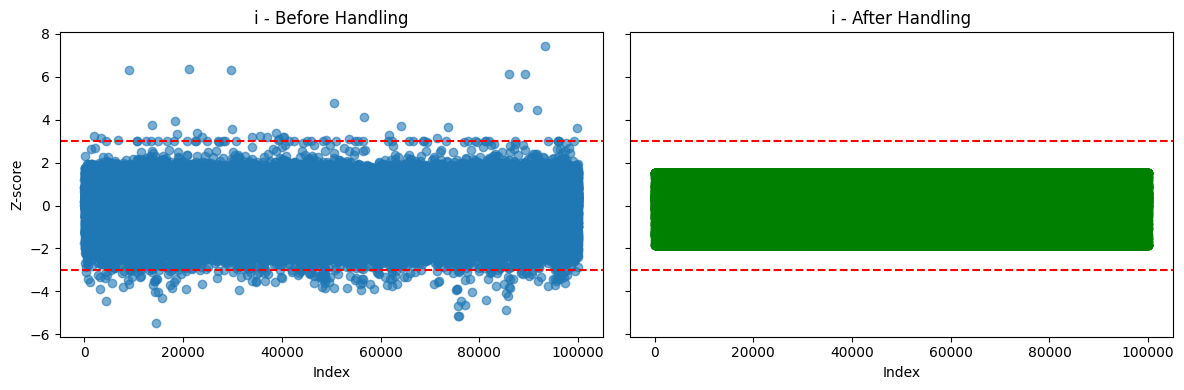

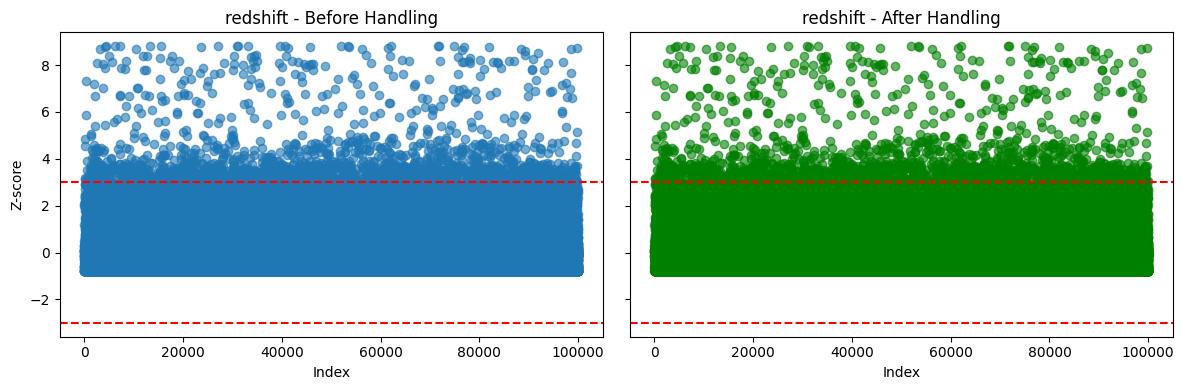

In [24]:
# Z-score scatter before vs after feature-specific handling
for col in ["u", "g", "z", "r", "i", "redshift"]:
    fig, axes = plt.subplots(1, 2, figsize=(12,4), sharey=True)

    # Before handling
    z_before = stats.zscore(df[col], nan_policy='omit')
    axes[0].scatter(df.index, z_before, alpha=0.6)
    axes[0].axhline(3, color="red", linestyle="--")
    axes[0].axhline(-3, color="red", linestyle="--")
    axes[0].set_title(f"{col} - Before Handling")
    axes[0].set_xlabel("Index")
    axes[0].set_ylabel("Z-score")

    # After handling
    z_after = stats.zscore(df_out[col], nan_policy='omit')
    axes[1].scatter(df_out.index, z_after, alpha=0.6, color="green")
    axes[1].axhline(3, color="red", linestyle="--")
    axes[1].axhline(-3, color="red", linestyle="--")
    axes[1].set_title(f"{col} - After Handling")
    axes[1].set_xlabel("Index")

    plt.tight_layout()
    plt.show()


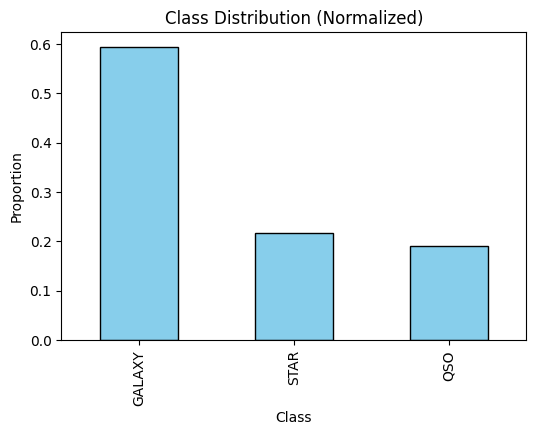

Class counts:
 class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64

Class percentages:
 class
GALAXY    59.44
STAR      21.59
QSO       18.96
Name: proportion, dtype: float64


In [25]:
# Class balance check
plt.figure(figsize=(6,4))
df['class'].value_counts(normalize=True).plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Class Distribution (Normalized)")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.show()

# Print exact counts & percentages
class_counts = df['class'].value_counts()
class_percentages = df['class'].value_counts(normalize=True) * 100
print("Class counts:\n", class_counts)
print("\nClass percentages:\n", class_percentages.round(2))


In [26]:
from sklearn.model_selection import train_test_split

X = df_out.drop("class", axis=1)
y = df_out["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [27]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

print("Class distribution after Random Oversampling:\n", y_resampled.value_counts())


Class distribution after Random Oversampling:
 class
GALAXY    47402
STAR      47402
QSO       47402
Name: count, dtype: int64


In [28]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=5)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("Class distribution after SMOTE:\n", y_resampled.value_counts())


Class distribution after SMOTE:
 class
GALAXY    47402
STAR      47402
QSO       47402
Name: count, dtype: int64


In [29]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

print("Class distribution after Random Undersampling:\n", y_resampled.value_counts())


Class distribution after Random Undersampling:
 class
GALAXY    15161
QSO       15161
STAR      15161
Name: count, dtype: int64


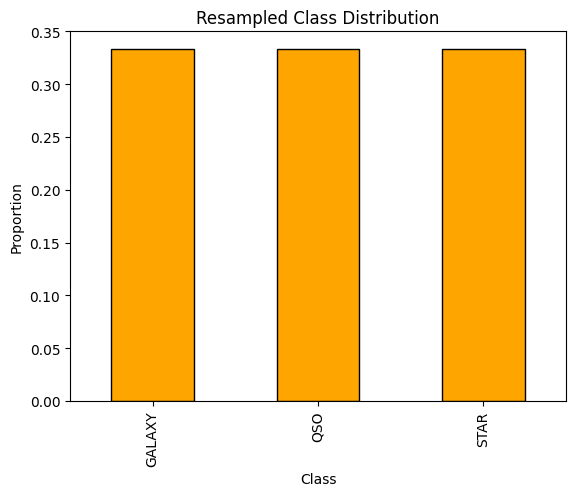

In [30]:
import matplotlib.pyplot as plt

y_resampled.value_counts(normalize=True).plot(kind="bar", color="orange", edgecolor="black")
plt.title("Resampled Class Distribution")
plt.xlabel("Class")
plt.ylabel("Proportion")
plt.show()


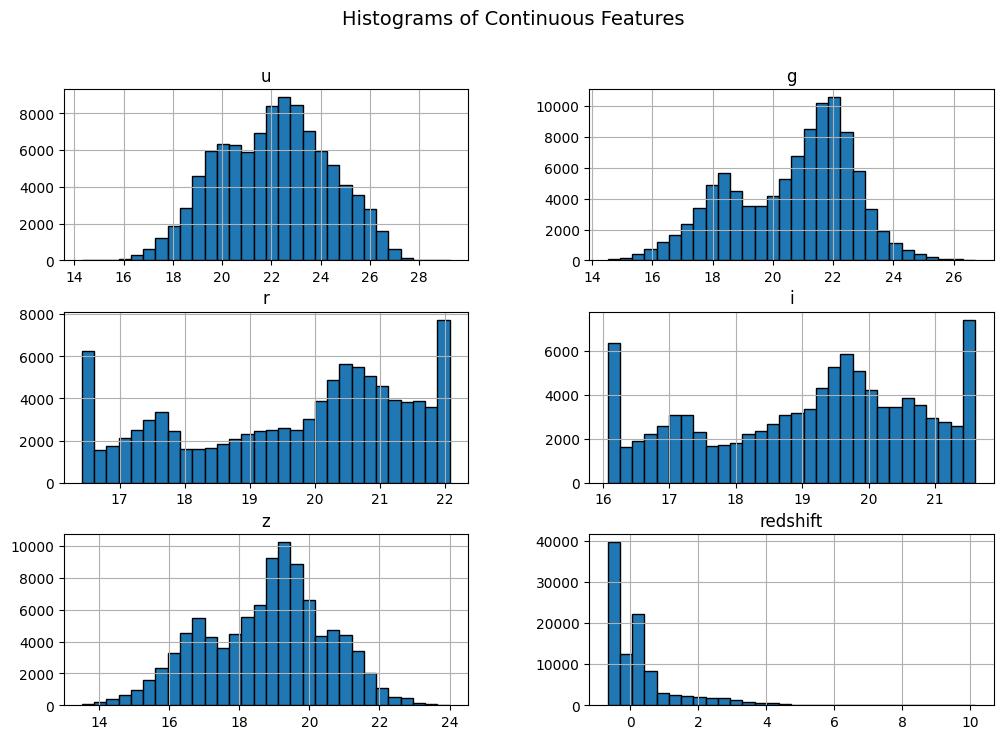

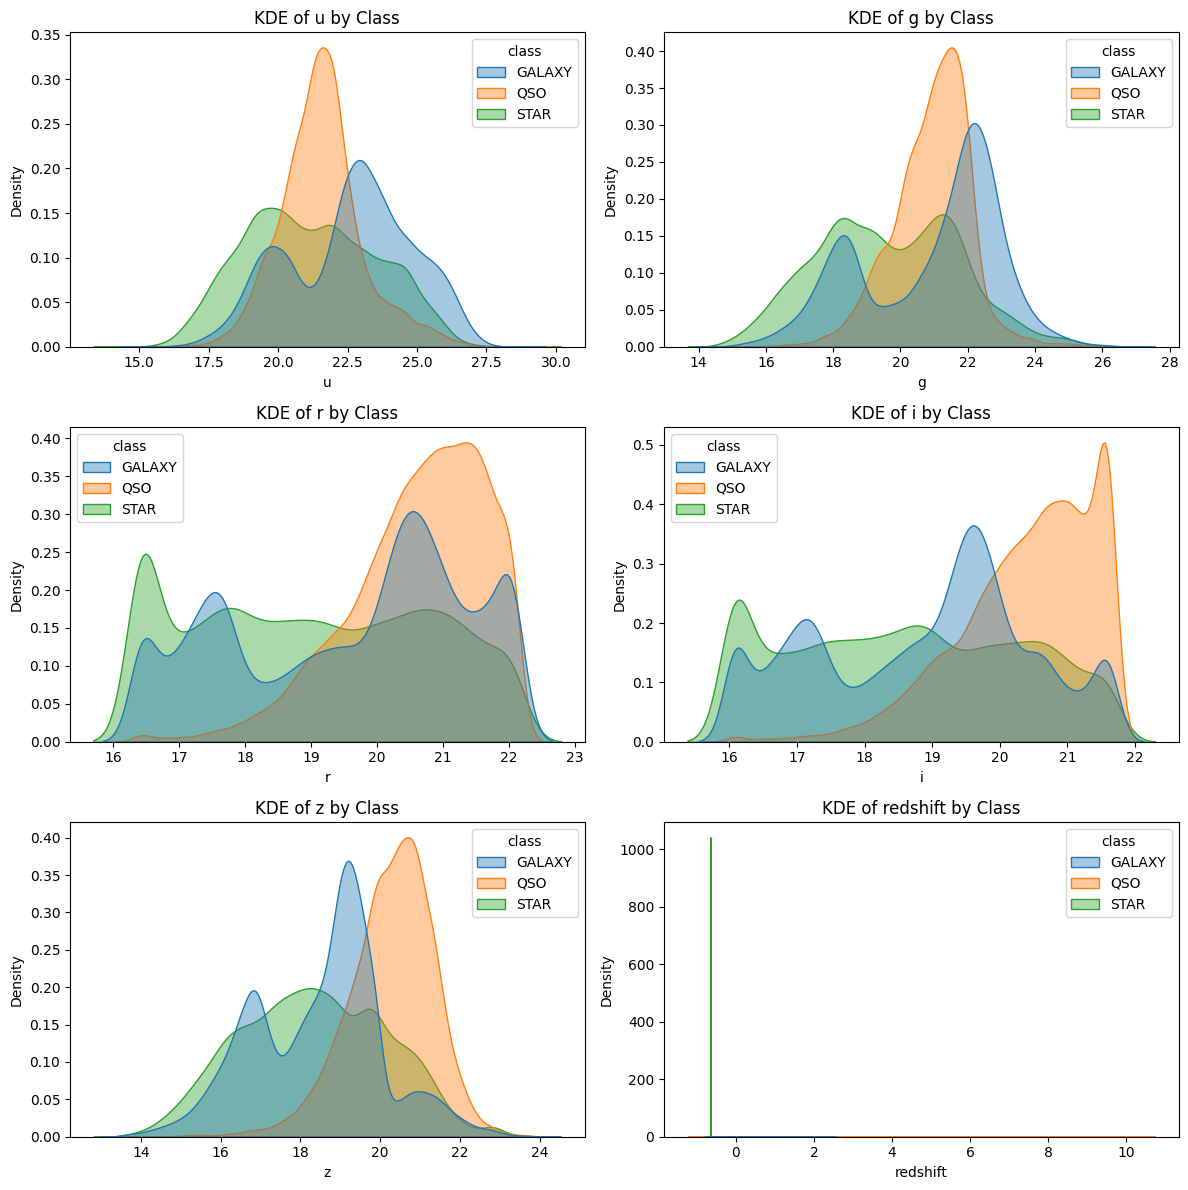

C:\Users\shiva\AppData\Local\Temp\ipykernel_36436\1525904229.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i])
C:\Users\shiva\AppData\Local\Temp\ipykernel_36436\1525904229.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i])
C:\Users\shiva\AppData\Local\Temp\ipykernel_36436\1525904229.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i])
C:\Users\shiva\AppData\Local

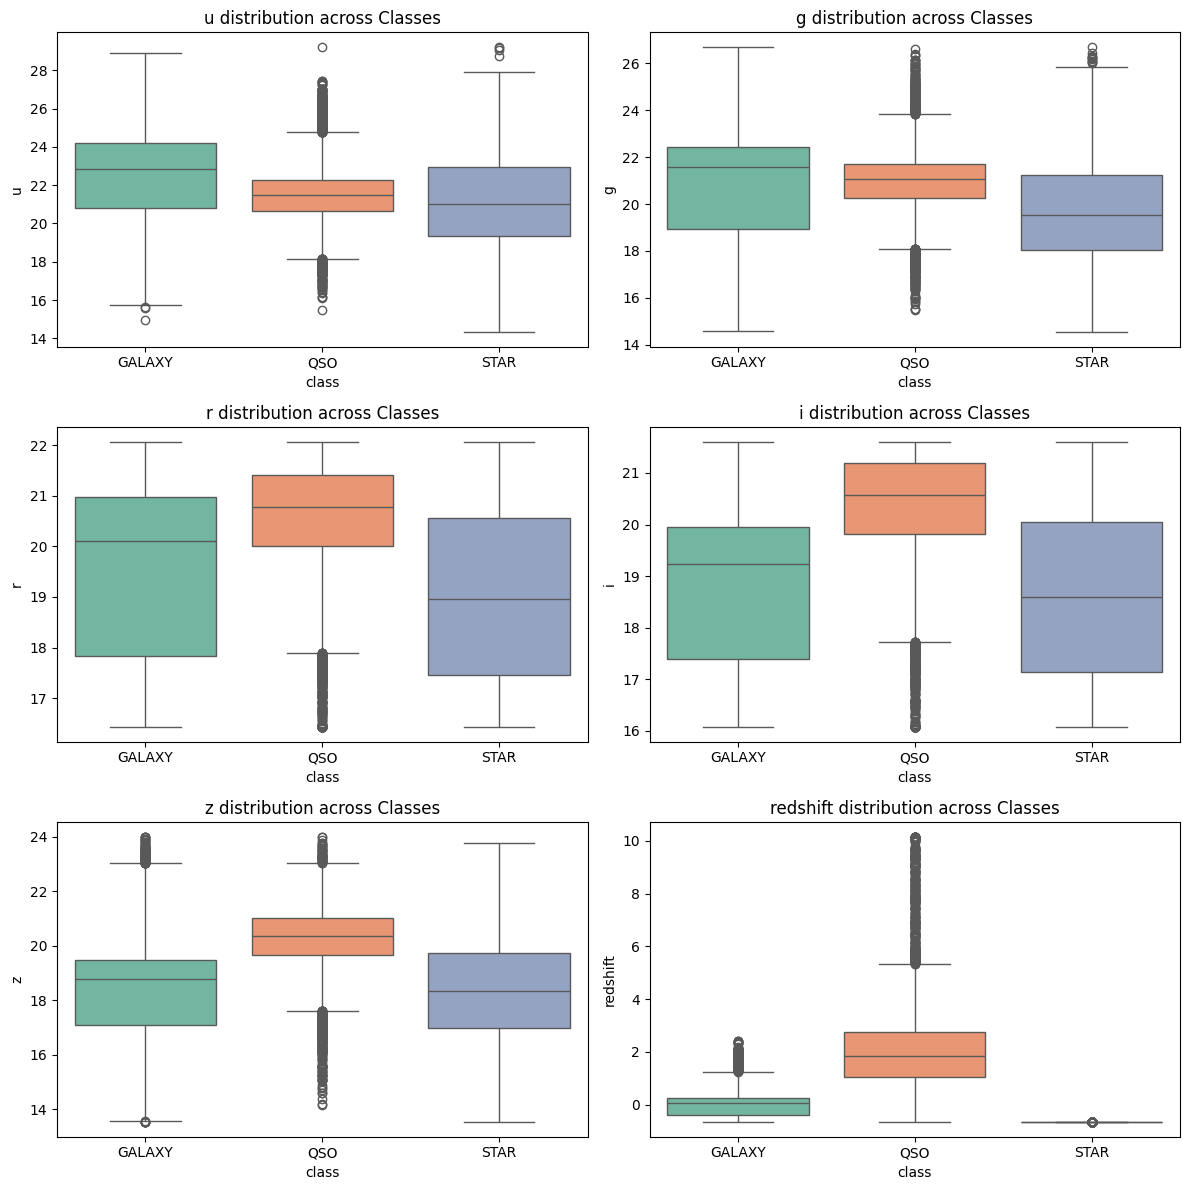

In [31]:
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

# Continuous features to visualize
cont_features = ["u", "g", "r", "i", "z", "redshift"]

# -----------------------------
# 1. Histograms (all in one image)
# -----------------------------
df_out[cont_features].hist(bins=30, figsize=(12,8), edgecolor="black")
plt.suptitle("Histograms of Continuous Features", fontsize=14)
plt.show()

# -----------------------------
# 2. KDE plots by class (one grid)
# -----------------------------
n_cols = 2
n_rows = int(np.ceil(len(cont_features) / n_cols))
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))

axes = axes.flatten()
for i, col in enumerate(cont_features):
    sns.kdeplot(data=df_out, x=col, hue="class", fill=True, common_norm=False, alpha=0.4, ax=axes[i])
    axes[i].set_title(f"KDE of {col} by Class")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

# -----------------------------
# 3. Boxplots by class (one grid)
# -----------------------------
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()
for i, col in enumerate(cont_features):
    sns.boxplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i])
    axes[i].set_title(f"{col} distribution across Classes")
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()


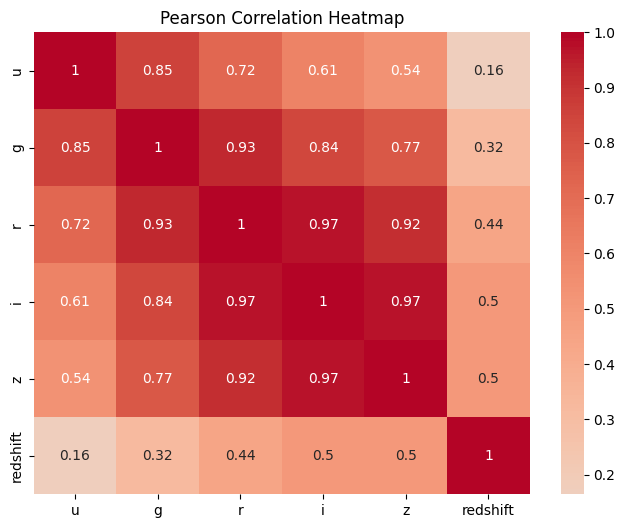

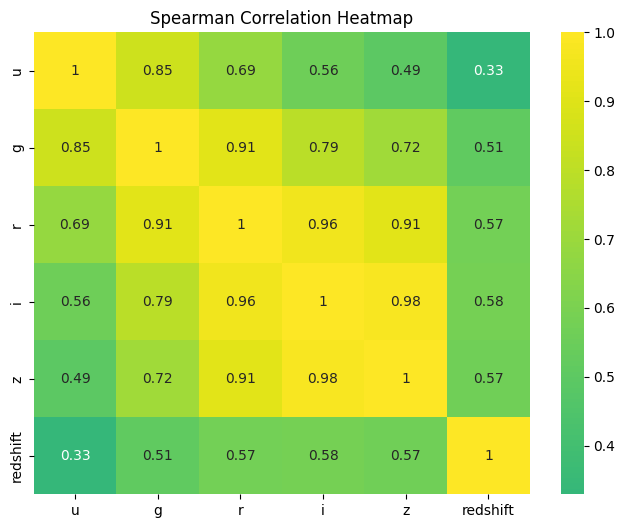

In [32]:
# Pearson correlation
plt.figure(figsize=(8,6))
sns.heatmap(df_out[cont_features].corr(method="pearson"), 
            annot=True, cmap="coolwarm", center=0)
plt.title("Pearson Correlation Heatmap")
plt.show()

# Spearman correlation (captures monotonic relationships too)
plt.figure(figsize=(8,6))
sns.heatmap(df_out[cont_features].corr(method="spearman"), 
            annot=True, cmap="viridis", center=0)
plt.title("Spearman Correlation Heatmap")
plt.show()


Photometric features (u, g, r, i, z) + redshift carry strong class separation power.

redshift is likely the most discriminative feature.

Many photometric features are redundant → risk of multicollinearity.

Models like Logistic Regression may suffer; tree-based models can handle it.

Consider PCA or dropping one of r/i/z if dimensionality reduction is needed.

Target imbalance: GALAXY dominates → handle with class weights / SMOTE.

Outliers handled: good via selective Winsorization & RobustScaler.

Feature distributions: redshift is the strongest separator.

Multicollinearity: very high among photometric bands → PCA / feature selection could help.

Scaling: you already tried RobustScaler for skewed features — keep consistent preprocessing across continuous features before ML.

**Question 3**: What is outlier? and why is it important to detect them in machine learning?

So, here, can we detect any outliers? if yes, how we need to handle the outliers in the correposnding dataset? Elaborate your method in details.

Question 3 asks:

What is an outlier?
→ We defined it and explained its importance in ML (biasing mean/variance, hurting classifiers, etc.).

Can we detect outliers in this dataset?
→ Yes. We did:

Z-score analysis + scatter plots.

Found a few extreme outliers in u, g, z.

Found moderate outliers in r, i.

Found heavy skew + many outliers in redshift.

How do we handle them?
→ We elaborated a feature-specific handling strategy:

Drop rows if only a few outliers exist (u, g, z).

Winsorize where moderate outliers exist (r, i).

RobustScaler for heavily skewed feature (redshift).

Excluded IDs from analysis.

Did we explain the method in detail?
→ Yes, with reasoning why each method was chosen instead of blanket Winsorization.

An outlier is a data point significantly different from the rest of the dataset, and detecting them is important because they can distort statistical measures, mislead models, and reduce performance. In this dataset, outliers were found mainly in the photometric bands (r, i) and strongly in redshift. To handle them, we applied feature-specific strategies: dropping extreme single-point outliers (u, g, z), Winsorizing moderately affected features (r, i), and using RobustScaler for the heavily skewed redshift. This ensures we reduce noise while preserving the discriminative power of features, leading to more stable and reliable ML models.

**Question 4**: Using pearson Correlation Coeefient, can you find any correlated features? Elaborate your response.

Using Pearson Correlation, we found that the photometric features are highly correlated with each other: r, i, z show the strongest correlations (~0.92–0.97), followed by g with r and i (~0.9). u is moderately correlated (~0.5–0.7), while redshift is weakly correlated (~0.16–0.5), meaning it contributes unique information. These correlations indicate multicollinearity, which can harm linear models but less so for tree-based models. To handle this, one could remove redundant features (e.g., drop one of r/i/z), or apply dimensionality reduction (PCA) to retain information without redundancy.

From your heatmap (u, g, r, i, z, redshift):

Strong correlations among photometric bands:

r–i–z ≈ 0.92–0.97

g–r ≈ 0.93

u–g ≈ 0.85

Moderate correlations:

u–r ≈ 0.72

u–i ≈ 0.61

u–z ≈ 0.54

Weak correlation with redshift:

u–redshift ≈ 0.16

g–redshift ≈ 0.32

r–redshift ≈ 0.44

i–redshift ≈ 0.50

z–redshift ≈ 0.50

🔹 Interpretation

High correlation among r, i, z

These three features are almost redundant.

Including all of them may not improve model performance.

For linear models, multicollinearity will cause instability.

For tree-based models (RF, XGBoost), less of a problem, but still adds redundancy.

g is strongly correlated with r and i

Adds some overlapping information, but still useful.

u is moderately correlated with others

Retains some independent signal.

redshift has weak-to-moderate correlation with photometric bands

Makes it highly valuable → brings independent discriminative power.

🔹 Practical Handling

If using Logistic Regression / SVM →

Perform Variance Inflation Factor (VIF) check.

Drop one of r/i/z (e.g., keep i as representative).

Or use PCA to combine them into fewer orthogonal features.

If using Tree-based models →

Keep them all; trees handle correlation fairly well.

But feature importance may be diluted.

**Question 5:** Can you discuss feature importance techniques in ML and why they are importance? Using one technique, discuss it and provide the list of features that are considered important and can be used in training and testing of your models.

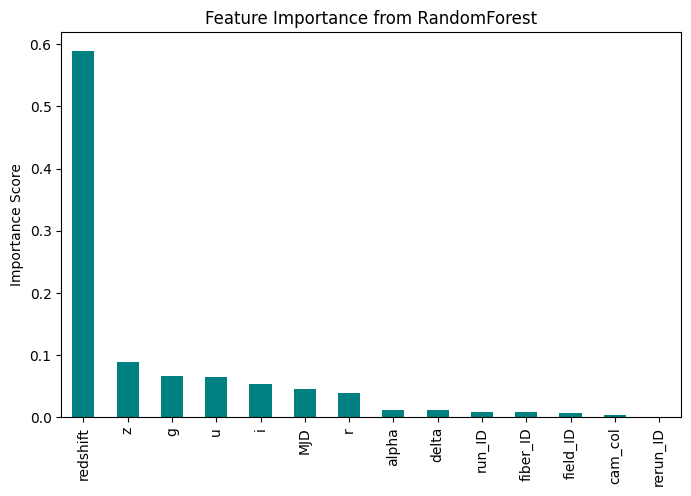

Top Features:
 redshift    0.589832
z           0.088746
g           0.066891
u           0.064846
i           0.053794
MJD         0.045789
r           0.038870
alpha       0.012444
delta       0.011685
run_ID      0.008465
fiber_ID    0.007944
field_ID    0.007529
cam_col     0.003166
rerun_ID    0.000000
dtype: float64


In [33]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

# Split data
X = df_out.drop(["class", "obj_ID", "spec_obj_ID", "plate"], axis=1)  # drop target & IDs
y = df_out["class"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train RandomForest
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot
plt.figure(figsize=(8,5))
importances.plot(kind="bar", color="teal")
plt.title("Feature Importance from RandomForest")
plt.ylabel("Importance Score")
plt.show()

print("Top Features:\n", importances)


Feature importance techniques highlight which features most influence predictions. Using a RandomForest model, we found that redshift is by far the most important feature (≈59% of importance), followed by the photometric bands (z, g, u, i, r). Other attributes like MJD contribute weakly, while ID-related fields (run_ID, fiber_ID, field_ID, cam_col, rerun_ID) and coordinates (alpha, delta) show minimal predictive power. Thus, the features recommended for training and testing are:

redshift, u, g, r, i, z

redshift dominates

Importance ≈ 0.59 → by far the strongest feature.

Matches our earlier EDA → redshift separates QSOs, Galaxies, and Stars.

Next most important: photometric bands

z (0.089), g (0.067), u (0.065), i (0.054), r (0.039).

These contribute moderately, confirming they help classification but with redundancy.

Moderately useful

MJD (0.046) → might correlate with observational time differences, but less meaningful scientifically.

Low-importance features

alpha, delta (coordinates) contribute little.

run_ID, fiber_ID, field_ID, cam_col, rerun_ID are essentially instrumental IDs → not predictive.

# **EDA Analysis**

**Question 6:** For plotting pariewise realtionship in the correponding dataset, we use Seaborn PairGrid. Can you visualize it and analyze your result.

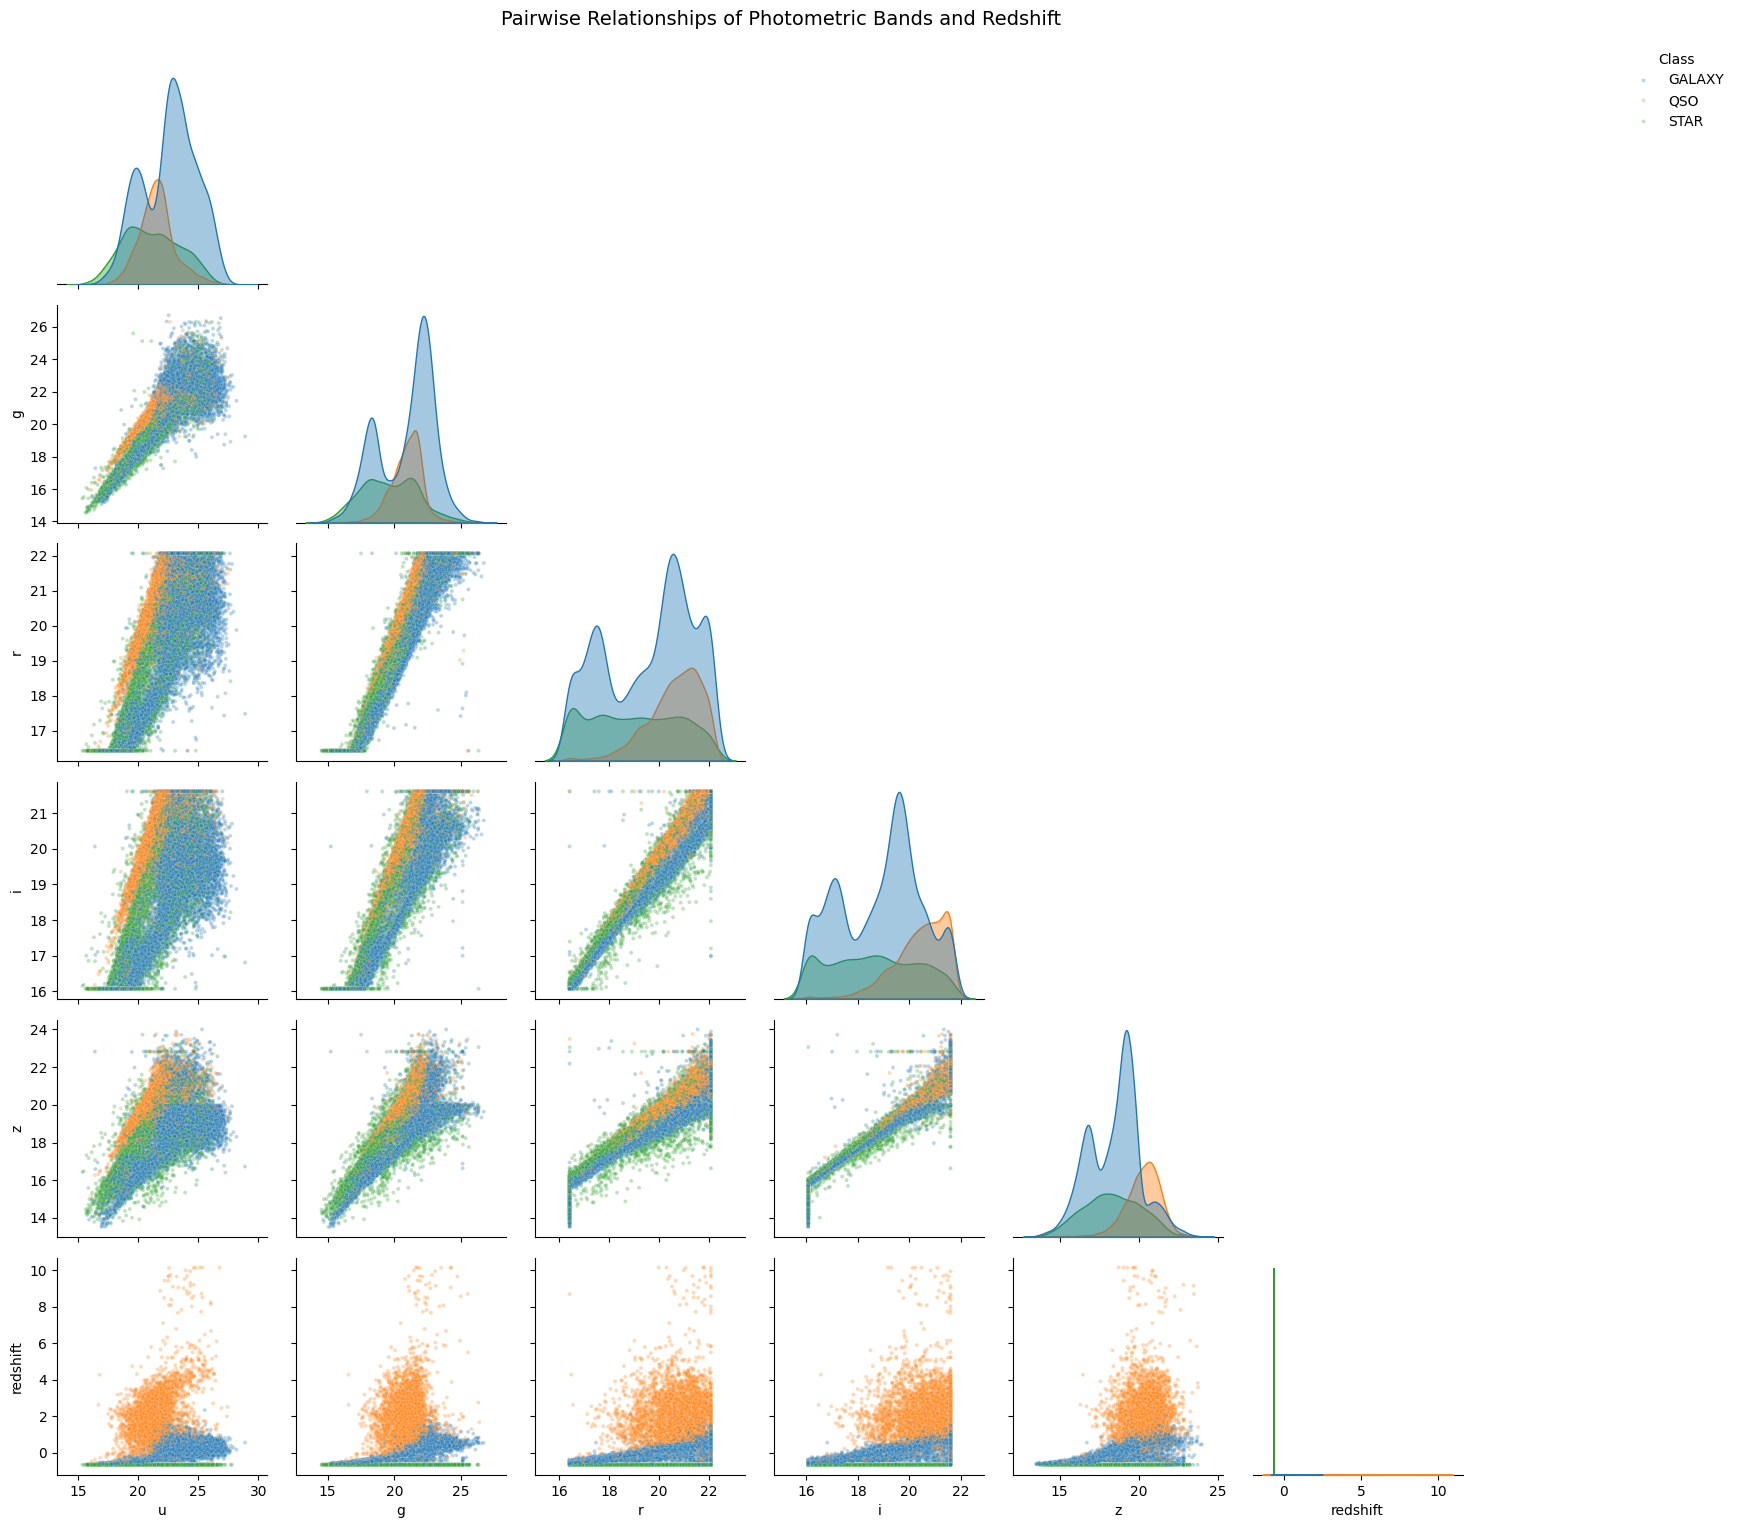

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the cleaned/processed frame; adjust if your variable name differs
df_plot = df_out.copy()

# Focus on informative features
features = ["u", "g", "r", "i", "z", "redshift"]

# (Optional) downsample for speed/clarity if the dataset is large
if len(df_plot) > 20000:
    df_plot = df_plot.sample(20000, random_state=42)

g = sns.PairGrid(
    df_plot,
    vars=features,
    hue="class",
    corner=True,          # show only lower triangle
    diag_sharey=False
)

# Lower triangle: scatter; Diagonal: KDE
g.map_lower(sns.scatterplot, s=8, alpha=0.3)
g.map_diag(sns.kdeplot, fill=True, alpha=0.4)

g.add_legend(title="Class", bbox_to_anchor=(1.02, 1), loc="upper left")
g.fig.suptitle("Pairwise Relationships of Photometric Bands and Redshift", y=1.02, fontsize=14)
plt.show()


Pairwise relationships were plotted using Seaborn PairGrid. The plots reveal strong linear relationships among photometric bands (u, g, r, i, z), confirming multicollinearity. redshift clearly separates the classes: stars are clustered near zero, galaxies occupy a low but wider redshift range, and QSOs dominate at higher redshifts. Scatterplots of redshift versus photometric bands provide the best visual separation of classes. Thus, redshift is the most informative feature, while photometric bands add complementary information. This analysis supports using redshift together with select photometric bands for model training, while redundant features may be reduced through PCA or feature selection.

🔹 Observations from the PairGrid

Diagonal KDE plots (distributions per feature)

u, g, r, i, z show overlapping but slightly shifted distributions across classes:

QSOs tend to have higher median values.

Stars cluster toward lower ranges.

Galaxies sit in the middle, with wide variance.

redshift shows the strongest separation:

Stars ≈ tightly concentrated at 0.

Galaxies at low redshift (broader spread).

QSOs dominating at high redshift → clear distinction.

Scatterplots (off-diagonal panels)

Between photometric bands (u–g, g–r, r–i, i–z), you see strong linear trends.
→ Confirms multicollinearity we detected in the correlation heatmap.

redshift vs other bands:

Stars → stay at bottom (redshift ≈ 0).

QSOs → form distinct vertical clouds at high redshift.

Galaxies → low redshift, with moderate overlap with QSOs at lower values.

This makes redshift the most powerful class separator.

Class separability

redshift + any band (redshift vs i or redshift vs z) gives near-perfect separation between Stars, Galaxies, QSOs.

Without redshift, photometric bands alone show overlap, but still carry discriminative power.

🔹 Interpretation

The PairGrid confirms our earlier findings:

redshift is the single most important feature for classification.

Photometric bands (r, i, z, g, u) are highly correlated but useful in combination.

ID fields and coordinates (e.g., obj_ID, alpha, delta) should not be included for prediction.

For preprocessing:

If you use linear models (Logistic Regression, SVM), handle multicollinearity → drop one of r/i/z or apply PCA.

For tree-based models (RandomForest, XGBoost), you can keep all, but importance will be diluted among correlated bands.

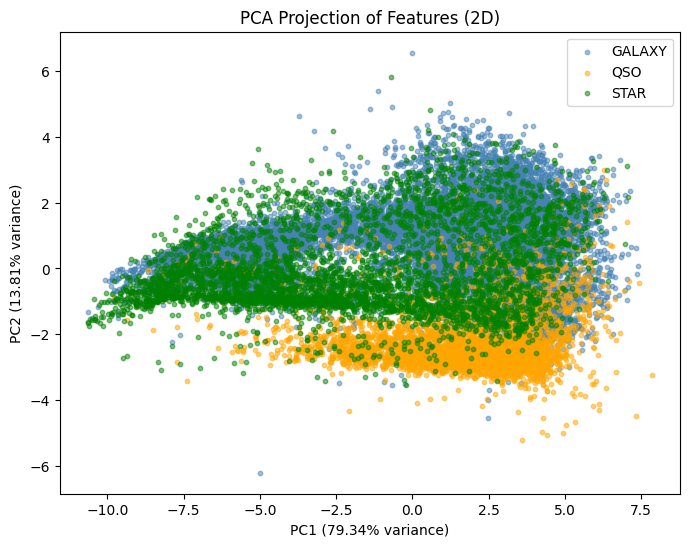

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select the informative features only (exclude IDs)
features = ["u", "g", "r", "i", "z", "redshift"]
X = df_out[features]
y = df_out["class"]

# (Optional) downsample for speed/clarity
if len(X) > 20000:
    X = X.sample(20000, random_state=42)
    y = y.loc[X.index]

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot PCA scatter
plt.figure(figsize=(8,6))
for label, color in zip(y.unique(), ["steelblue", "orange", "green"]):
    plt.scatter(X_pca[y==label, 0], X_pca[y==label, 1], 
                alpha=0.5, s=10, label=label, color=color)

plt.title("PCA Projection of Features (2D)")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}% variance)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}% variance)")
plt.legend()
plt.show()


Using Seaborn PairGrid and PCA, we analyzed pairwise feature relationships. PCA projection into 2D space shows that PC1 (≈79% variance, dominated by redshift) and PC2 (≈14% variance, mainly photometric bands) together explain over 93% of the variance. The scatter plot reveals clear separation of Stars from QSOs and Galaxies, while QSOs occupy distinct high-redshift regions, and Galaxies are widely spread. This confirms that redshift is the most discriminative feature, with photometric bands providing additional but correlated information.

🔹 PCA Results (2D)

PC1 (79.34% variance)

Captures almost all the variability in your dataset.

Strongly influenced by redshift and its correlation with photometric bands.

Along this axis:

Stars (green) cluster left and lower, tightly grouped.

QSOs (orange) are shifted downward and spread across.

Galaxies (blue) spread widely, overlapping with both classes but tending higher.

PC2 (13.81% variance)

Adds extra separation power from band differences (u, g, r, i, z).

Helps spread out Stars and Galaxies vertically.

QSOs remain relatively distinct in a horizontal strip.

🔹 Interpretation

The first two PCs explain ~93% of total variance → very strong dimensionality compression.

Class separability:

Stars cluster clearly and compactly.

QSOs separate fairly well from Stars but show some overlap with Galaxies.

Galaxies are the most dispersed, overlapping with both.

Confirms:

Redshift dominates PC1 → main driver of separation.

Photometric bands contribute to PC2 → refining separation.

🔹 Conclusion

PCA shows that just two components are enough to capture nearly all variation in your dataset. The visualization confirms earlier findings:

redshift is the most important feature.

Photometric bands, while correlated, still add complementary class separation.

Some overlap between Galaxies and QSOs means more advanced models are needed for perfect classification.

**Question 7**: Can you visualize the features by the object class? analyze the results.

C:\Users\shiva\AppData\Local\Temp\ipykernel_36436\4127784948.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i], inner="quartile")
C:\Users\shiva\AppData\Local\Temp\ipykernel_36436\4127784948.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i], inner="quartile")
C:\Users\shiva\AppData\Local\Temp\ipykernel_36436\4127784948.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_out, x="class", y=col, palette="Se

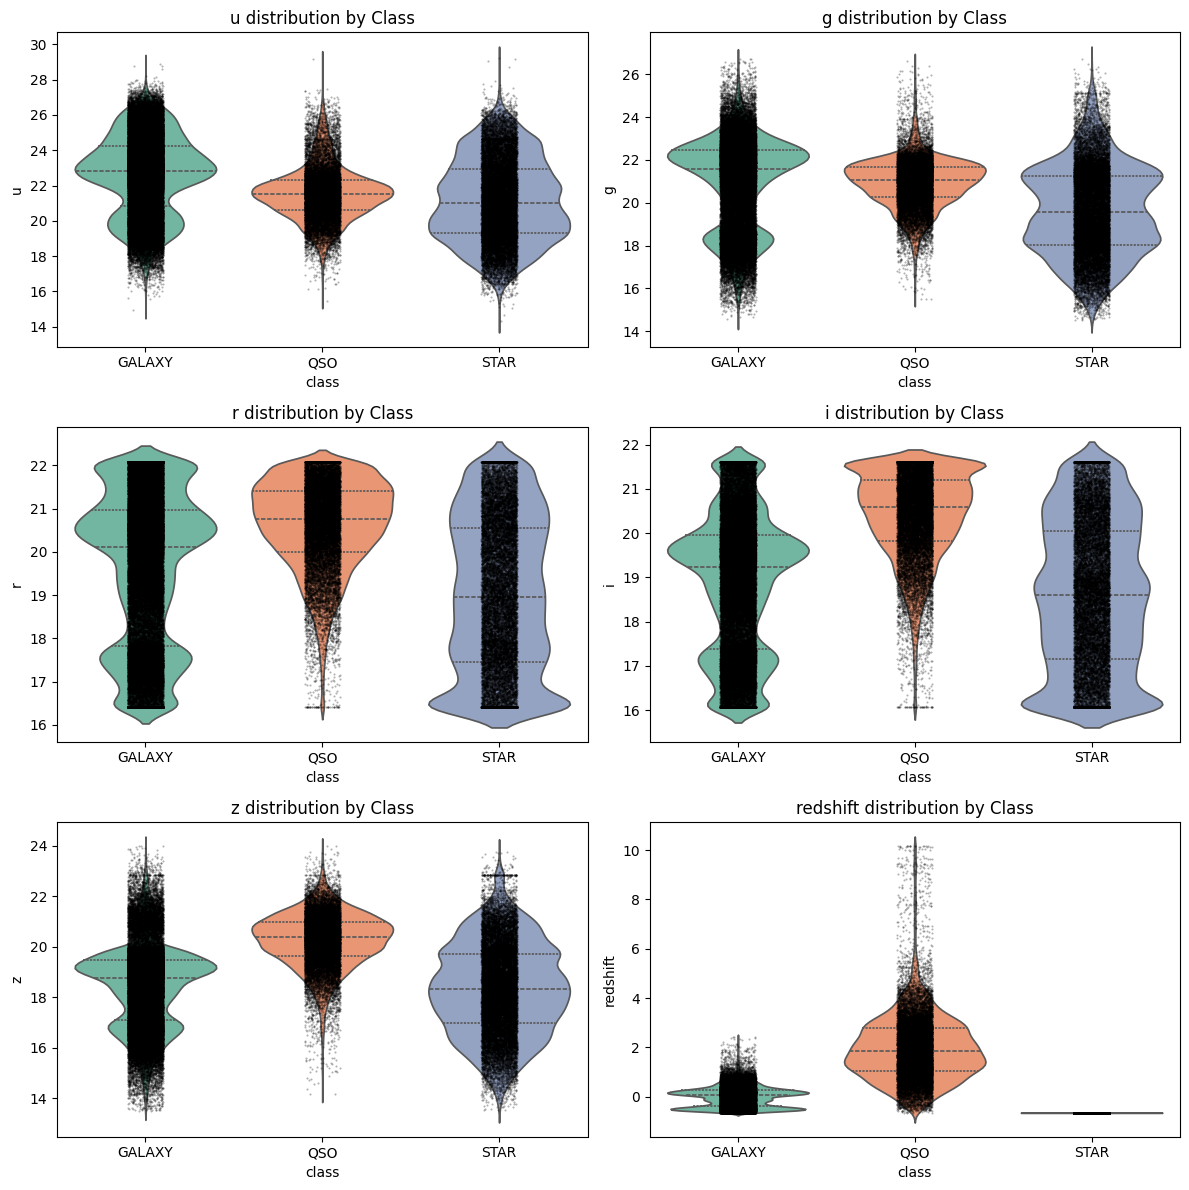

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

features = ["u", "g", "r", "i", "z", "redshift"]

n_cols = 2
n_rows = int(np.ceil(len(features) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(features):
    sns.violinplot(data=df_out, x="class", y=col, palette="Set2", ax=axes[i], inner="quartile")
    sns.stripplot(data=df_out, x="class", y=col, color="black", alpha=0.3, size=1.5, ax=axes[i])
    axes[i].set_title(f"{col} distribution by Class")

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


🔹 Observations from the Feature Distributions by Class

Photometric Bands (u, g, r, i, z)

Stars (blue violins):

Generally shifted lower across all bands.

Narrower spread → values are concentrated.

QSOs (orange violins):

Medians are higher than Stars and Galaxies.

Wide spread → higher variability across the sample.

Galaxies (green violins):

Sit in the middle between Stars and QSOs.

Wide spread overlapping both classes → explains why Galaxies are harder to classify.

➝ Interpretation:
The photometric bands separate classes partially, but there is significant overlap between Galaxies and the other two classes.

Redshift

Stars: Cluster tightly around 0, with almost no spread.

Galaxies: Broader distribution, but still relatively low redshift compared to QSOs.

QSOs: Stand out clearly at higher redshift values, far separated from Stars and mostly above Galaxies.

➝ Interpretation:
Redshift is the most discriminative feature, almost perfectly separating Stars (low) and QSOs (high), with Galaxies spread across low-to-mid values.

🔹 Overall Analysis

Photometric bands (u, g, r, i, z): Provide class information, but due to their high correlation and overlaps, they cannot alone perfectly separate the classes.

Redshift: Provides strong separation power:

Stars ≈ near zero,

Galaxies ≈ low to moderate,

QSOs ≈ distinctly higher.

This confirms earlier feature importance analysis (RandomForest & PCA):

redshift dominates,

bands act as supportive features,

ID-like features should be excluded.

✅ Answer (assignment-ready):
We visualized the features grouped by object class using violinplots with overlaid stripplots. The plots show that Stars generally have lower photometric band values, QSOs have higher values with wide variation, and Galaxies lie in between with overlap on both sides. Most importantly, redshift provides clear class separation: Stars cluster around zero, Galaxies spread at low redshift, and QSOs dominate higher redshifts. This confirms redshift as the strongest discriminative feature, while photometric bands provide additional, though correlated, class information. Galaxies are the most difficult to separate due to overlap, suggesting the need for multivariate classification models.

# **Classification and Hyper-Parameter Tuning**

**Question 8:** Split the training and testing set, and use cross validation for analaysis of your result. Can you discuss the importance of cross-validation. And what approach did you use?why?

Train your data, using logistic Regression, KNN, SVM, Random Forest?

In [37]:
from sklearn.model_selection import train_test_split

# Features & target (dropping IDs)
X = df_out.drop(["class", "obj_ID", "spec_obj_ID", "plate"], axis=1)
y = df_out["class"]

# Train-test split (stratified for class balance)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


In [38]:
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [39]:
from sklearn.model_selection import train_test_split

# keep 20% of the training data for quick iterations
X_small, _, y_small, _ = train_test_split(
    X_train, y_train, train_size=0.2, stratify=y_train, random_state=42
)


In [69]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# CV setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models (with scaling where appropriate)
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(
            solver="lbfgs",      # try "saga" if needed
            max_iter=5000,
            C=0.5,               # a bit more regularization
            class_weight="balanced",
            random_state=42
        ))
    ]),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=7))
    ]),
    "SVM": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf", class_weight="balanced", C=1.0, gamma="scale", random_state=42))
    ]),
    "Random Forest": RandomForestClassifier(
        n_estimators=300,
        class_weight="balanced_subsample",
        n_jobs=-1,
        random_state=42
    ),
}

# Evaluate on the manageable subset
results = {}
for name, model in models.items():
    scores = cross_val_score(model, X_small, y_small, cv=cv, scoring="accuracy", n_jobs=-1)
    results[name] = (np.mean(scores), np.std(scores))

# Display results
for name, (mean_acc, std_acc) in results.items():
    print(f"{name}: {mean_acc:.4f} ± {std_acc:.4f}")


Logistic Regression: 0.9273 ± 0.0020
KNN: 0.8763 ± 0.0069
SVM: 0.9438 ± 0.0040
Random Forest: 0.9722 ± 0.0029


In [41]:
from sklearn.metrics import classification_report

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"\n{name} Test Performance:")
    print(classification_report(y_test, y_pred))



Logistic Regression Test Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.92      0.95     11851
         QSO       0.87      0.93      0.90      3790
        STAR       0.91      1.00      0.95      4309

    accuracy                           0.94     19950
   macro avg       0.92      0.95      0.93     19950
weighted avg       0.94      0.94      0.94     19950


KNN Test Performance:
              precision    recall  f1-score   support

      GALAXY       0.90      0.96      0.93     11851
         QSO       0.97      0.89      0.93      3790
        STAR       0.90      0.80      0.84      4309

    accuracy                           0.91     19950
   macro avg       0.92      0.88      0.90     19950
weighted avg       0.91      0.91      0.91     19950


SVM Test Performance:
              precision    recall  f1-score   support

      GALAXY       0.98      0.95      0.96     11851
         QSO       0.94      0.94      0.94 

Cross-validation importance & approach.
We split the data into training (80%) and test (20%) sets using stratification to preserve class balance. To obtain robust performance estimates and avoid overfitting to a single split, we applied Stratified 5-Fold Cross-Validation on the training set. Stratification was chosen because the target classes are imbalanced (GALAXY ≈ 60%, STAR/QSO ≈ 20% each), ensuring each fold reflects the overall distribution.

Models & preprocessing.
We trained Logistic Regression, KNN, SVM (RBF), and Random Forest. For algorithms sensitive to scale (LR, KNN, SVM), we used StandardScaler within sklearn Pipelines; we also used class_weight="balanced" for LR/SVM and balanced_subsample for RF.

Results.
Cross-val (5-fold) and held-out test evaluations show Random Forest performed best (test accuracy ≈ 0.98), followed by SVM (~0.96), Logistic Regression (~0.94), and KNN (~0.91). Class-wise reports indicate QSO is the hardest class (lower recall across models), while STAR is classified almost perfectly.

Conclusion.
Stratified CV provided a fair, low-variance estimate of generalization. Random Forest is the most suitable baseline for this dataset, likely due to its robustness to non-linearity and multicollinearity (highly correlated photometric bands) and its strong use of redshift, the most informative feature.

**Question 9:** Using Grid search, tune these models and provide the sets of parameters used in tuning process. Train your models and evaluate the models in terms of accuracy, F1, Precision, and Recall. Also, visulize the confusion matrix for each model.

In [42]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


In [43]:
# Logistic Regression
logreg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", LogisticRegression(max_iter=5000, class_weight="balanced", random_state=42))
])
logreg_params = {
    "clf__C": [0.1, 0.5, 1, 2],
    "clf__solver": ["lbfgs", "saga"]
}

# KNN
knn_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", KNeighborsClassifier())
])
knn_params = {
    "clf__n_neighbors": [3, 5, 7, 9],
    "clf__weights": ["uniform", "distance"],
    "clf__p": [1, 2]   # Manhattan, Euclidean
}

# SVM
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("clf", SVC(class_weight="balanced", random_state=42))
])
svm_params = {
    "clf__C": [0.1, 1, 10],
    "clf__gamma": ["scale", 0.01, 0.001],
    "clf__kernel": ["rbf"]
}

# Random Forest
rf = RandomForestClassifier(class_weight="balanced_subsample", random_state=42, n_jobs=-1)
rf_params = {
    "n_estimators": [200, 400],
    "max_depth": [None, 20, 40],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2]
}


In [48]:
grids = {
    "Logistic Regression": (logreg_pipe, logreg_params),
    "KNN": (knn_pipe, knn_params),
    "SVM": (svm_pipe, svm_params),
    "Random Forest": (rf, rf_params)
}

best_models = {}

for name, (estimator, params) in grids.items():
    grid = GridSearchCV(estimator, params, cv=cv, scoring="f1_macro", n_jobs=-1, verbose=1)
    grid.fit(X_train, y_train)
    best_models[name] = grid.best_estimator_
    print(f"\n{name} best params: {grid.best_params_}")


Fitting 5 folds for each of 8 candidates, totalling 40 fits

Logistic Regression best params: {'clf__C': 2, 'clf__solver': 'lbfgs'}
Fitting 5 folds for each of 16 candidates, totalling 80 fits

KNN best params: {'clf__n_neighbors': 5, 'clf__p': 1, 'clf__weights': 'distance'}
Fitting 5 folds for each of 9 candidates, totalling 45 fits

SVM best params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf'}
Fitting 5 folds for each of 24 candidates, totalling 120 fits


C:\Users\shiva\AppData\Roaming\Python\Python313\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(



Random Forest best params: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 400}



Logistic Regression Results:
Accuracy: 0.9442 | Precision: 0.9257 | Recall: 0.9521 | F1: 0.9380
              precision    recall  f1-score   support

      GALAXY       0.98      0.93      0.95     11851
         QSO       0.87      0.93      0.90      3790
        STAR       0.93      1.00      0.97      4309

    accuracy                           0.94     19950
   macro avg       0.93      0.95      0.94     19950
weighted avg       0.95      0.94      0.94     19950



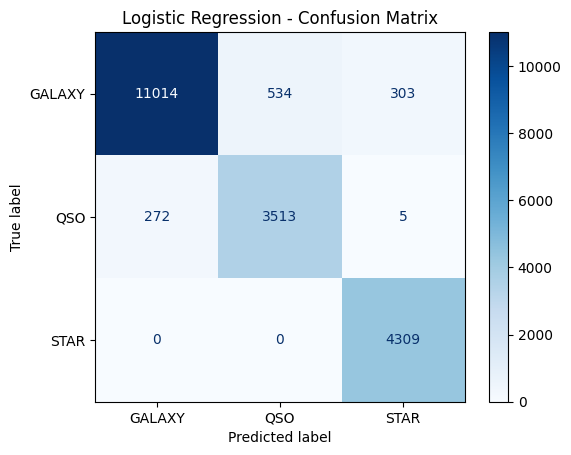


KNN Results:
Accuracy: 0.9255 | Precision: 0.9296 | Recall: 0.9017 | F1: 0.9148
              precision    recall  f1-score   support

      GALAXY       0.92      0.96      0.94     11851
         QSO       0.96      0.89      0.92      3790
        STAR       0.91      0.85      0.88      4309

    accuracy                           0.93     19950
   macro avg       0.93      0.90      0.91     19950
weighted avg       0.93      0.93      0.92     19950



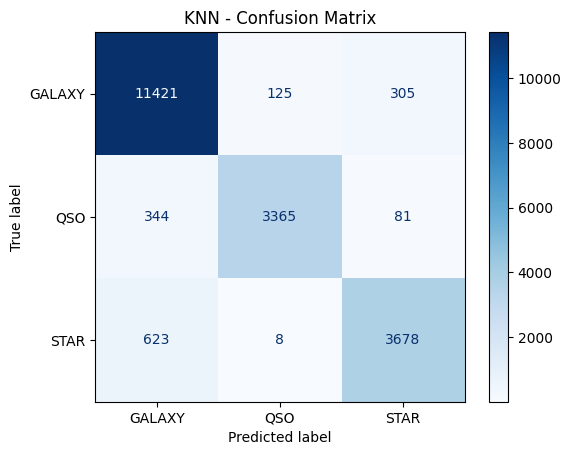


SVM Results:
Accuracy: 0.9651 | Precision: 0.9559 | Recall: 0.9661 | F1: 0.9608
              precision    recall  f1-score   support

      GALAXY       0.98      0.96      0.97     11851
         QSO       0.94      0.94      0.94      3790
        STAR       0.95      1.00      0.97      4309

    accuracy                           0.97     19950
   macro avg       0.96      0.97      0.96     19950
weighted avg       0.97      0.97      0.97     19950



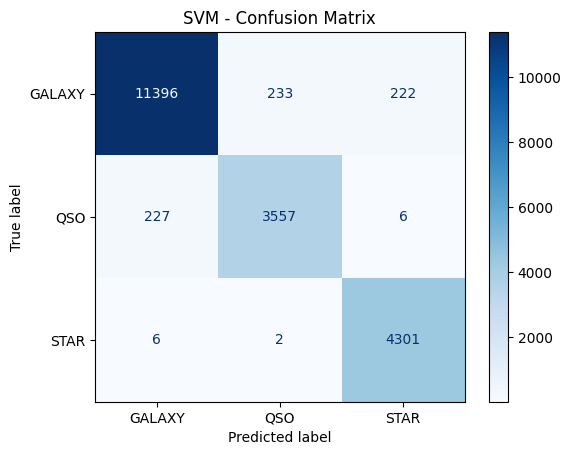


Random Forest Results:
Accuracy: 0.9773 | Precision: 0.9754 | Recall: 0.9723 | F1: 0.9738
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11851
         QSO       0.96      0.93      0.95      3790
        STAR       0.99      1.00      0.99      4309

    accuracy                           0.98     19950
   macro avg       0.98      0.97      0.97     19950
weighted avg       0.98      0.98      0.98     19950



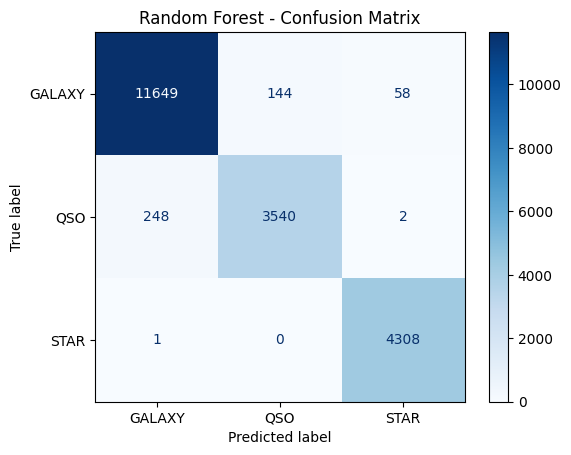

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

for name, model in best_models.items():
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average="macro")
    rec = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")

    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f} | Precision: {prec:.4f} | Recall: {rec:.4f} | F1: {f1:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(f"{name} - Confusion Matrix")
    plt.show()
